Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock,
Germany

# Tutorial Digital Signal Processing

**DFT Introduction**,
Winter Semester 2021/22 (Course #24505)

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

Feel free to contact lecturer frank.schultz@uni-rostock.de

In [1]:
import timeit

import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft
from numpy.linalg import inv
from scipy.special import diric

## Example 1: Spectral analysis of self defined signal mixture

In [DFT Intro](../dft_introduction.ipynb), we learned that the DFT is able to compute the spectral frequency components of signals. So why shouldn´t we prove it with a self-generated signal mixture?

Let´s define three different sine signals $x_1(t),x_2(t)$ and $x_3(t)$ with the amplitudes $A_1=2$, $A_2=3$ and $A_3=0.5$. Furthermore, the signals have frequencies of $f_1=1$, $f_2=4$ and $f_3 =7$. 

$$x_1(t) = A_1 sin(2\pi f_1 t)$$
$$x_2(t) = A_2 sin(2\pi f_2 t)$$
$$x_3(t) = A_3 sin(2\pi f_3 t)$$

The sample rate is defined as `sr`$=128$ and the sampling interval `ts`$=1$ /`sr`. Following this, the number of samples is `N`$=128$. And at this point, of cause, the signals could be notated as $x[k]$, because it is not possible to generate and visualize continues signals on a computer. But due to the good interpolation, we leave the notation as $x(t)$.

Text(0, 0.5, 'x(t)')

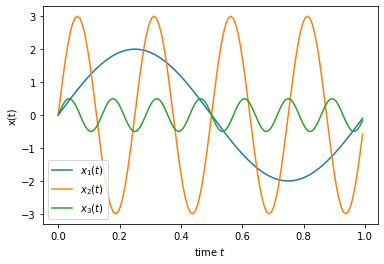

In [2]:
# sampling rate
sr = 128
# sampling interval
ts = 1.0 / sr
t = np.arange(0, 1, ts)

# x_1
x_1 = 2 * np.sin(2 * np.pi * 1 * t)
# x_2
x_2 = 3 * np.sin(2 * np.pi * 4 * t)
# x_3
x_3 = 0.5 * np.sin(2 * np.pi * 7 * t)

plt.plot(t, x_1, label=r"$x_1(t)$")
plt.plot(t, x_2, label=r"$x_2(t)$")
plt.plot(t, x_3, label=r"$x_3(t)$")
plt.legend()
plt.xlabel(r"time $t$")
plt.ylabel(r"x(t)")

Because of the sample rate `sr` of $128$ the three different signals look quite smooth. If we would lower the sample rate, the signals would get some edges. You can try it yourself by changing `sr`!

Now let's add the signals up like: $x(t) = x_1(t)+ x_2(t)+ x_3(t)$ and store it inside the variable `x_t`.

Text(0, 0.5, 'x(t)')

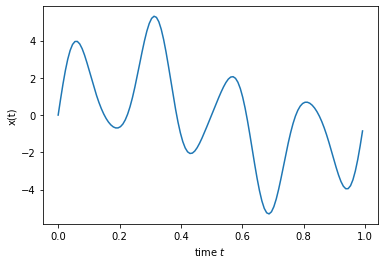

In [3]:
x_t = x_1 + x_2 + x_3

plt.plot(t, x_t)
plt.xlabel(r"time $t$")
plt.ylabel(r"x(t)")

Imagine at this point you see this plottet signal $x(t)$ the first time and you are very interested in its composition. What do you do?

Of cause, it is time to compute the DFT of the signal `x_t`. We compute it with the `fft` function of the `numpy` package. To receive the right frequency and amplitude scale we have to normalize it with the known sample rate `sr`. 
Due to the symmetric DFT spectrum, we only need half of DFT spectrum length, `N`$/2$.

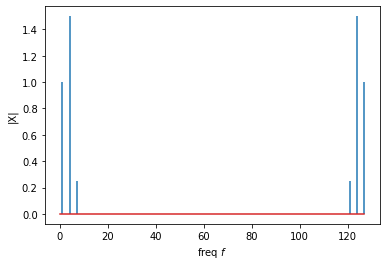

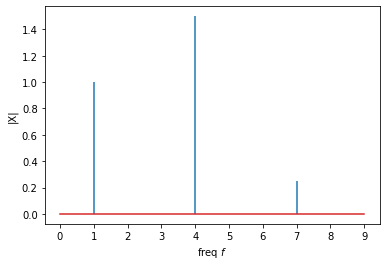

In [6]:
# Compute DFT
X_t = fft(x_t)

# calculate the frequency
N = len(X_t)
n = np.arange(N)
T = N / sr
freq = n / T

# get first half of spectrum
freq_half = freq[:] / (N // 2)

# normalise the amplitude
X_t = X_t / N 

plt.stem(freq, np.abs(X_t), markerfmt=" ")
plt.xlabel(r"freq $f$")
plt.ylabel("|X|")
plt.show()
plt.stem(freq[:10], np.abs(X_t)[:10], markerfmt=" ")
plt.xticks(np.arange(10))
plt.xlabel(r"freq $f$")
plt.ylabel("|X|")
plt.show()

The visualized frequency DFT spectrum is symmetric. So we just need the first half of the spectrum. The second plot contains the same information on a more detailed frequency index scale. Comparing the frequency and amplitudes of the stems, we see, that we get exactly the values of the at the beginning defined signals $x_1(t)$,$x_2(t)$ and $x_3(t)$.

Just for further proof let´s compute the IDFT and we obtain the signal mixture $x(t)$.

Text(0, 0.5, 'x(t)')

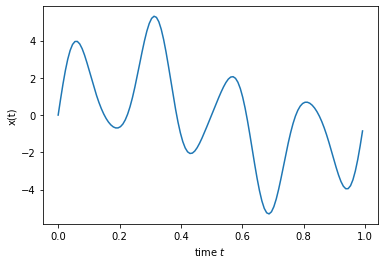

In [14]:
x_t = ifft(X_t)

# amplitude reconstruction
x_t = x_t*N

plt.plot(t,np.real(x_t))
plt.xlabel(r"time $t$")
plt.ylabel(r"x(t)")

## Example 2: IDFT Signal Synthesis for N=8

Let us synthesize a discrete-time signal by using the IDFT in matrix notation for $N=8$.

The signal should contain a DC value, the first and second eigenfrequency with different amplitudes, such as

\begin{equation}
\mathbf{x}_\mu = [8, 2, 4, 0, 0, 0, 0, 0]^\text{T}
\end{equation}

using large `X_test` in code.

In [ ]:
if N == 8:
    X_test = np.array([8, 2, 4, 0, 0, 0, 0, 0])
    # x_test = 1/N*W@X_test  # >= Python3.5
    x_test = 1 / N * np.matmul(W, X_test)

    plt.stem(
        k, np.real(x_test), label="real", markerfmt="C0o", basefmt="C0:", linefmt="C0:"
    )
    plt.stem(
        k, np.imag(x_test), label="imag", markerfmt="C1o", basefmt="C1:", linefmt="C1:"
    )
    # note that connecting the samples by lines is actually wrong, we
    # use it anyway for more visual convenience
    plt.plot(k, np.real(x_test), "C0o-", lw=0.5)
    plt.plot(k, np.imag(x_test), "C1o-", lw=0.5)
    plt.xlabel(r"sample $k$")
    plt.ylabel(r"$x[k]$")
    plt.legend()
    plt.grid(True)

    # check if results are identical with numpy ifft package
    print(np.allclose(ifft(X_test), x_test))
    print("DC is 1 as expected: ", np.mean(x_test))

This is a linear combination of the Fourier matrix columns, which are the DFT eigensignals, as 

In [ ]:
if N == 8:
    x_test2 = X_test[0] * W[:, 0] + X_test[1] * W[:, 1] + X_test[2] * W[:, 2]

We don't need summing the other columns, since their DFT coefficients in `X_test` are zero.

Finally, normalizing yields the IDFT.

In [ ]:
if N == 8:
    x_test2 *= 1 / N
    print(np.allclose(x_test, x_test2))  # check with result before

## Initial Example: DFT Spectrum Analysis for N=8

Now, let us calculate the DFT of the signal `x_test`. As result, we'd expect the DFT vector

\begin{equation}
\mathbf{x}_\mu = [8, 2, 4, 0, 0, 0, 0, 0]^\text{T}
\end{equation}

that we started from.

In [ ]:
if N == 8:
    # X_test2 = np.conj(W)@x_test  # >= Python3.5
    X_test2 = np.matmul(np.conj(W), x_test)  # DFT, i.e. analysis
    print(np.allclose(X_test, X_test2))  # check with result before

This looks good. It is advisable also to check against the `numpy.fft` implementation:

In [ ]:
if N == 8:
    print(np.allclose(fft(x_test), X_test))

Besides different quantization errors in range $10^{-15...-16}$ (which is prominent even with 64Bit double precision calculation)
all results produce the same output.

The analysis stage for the discrete-time signal domain, i.e. the DFT
can be reinvented by some intuition:
How 'much' of the reference signal $\mathbf{w}_{\text{column i}}$
(any column in $\mathbf{W}$)
is contained in the discrete-time signal $\mathbf{x}_k$ that is to be analysed.

In signal processing / statistic terms we look for the amount of correlation
of the signals
$\mathbf{w}_{\text{column i}}$ and $\mathbf{x}_k$.

In linear algebra terms we are interested in the projection of $\mathbf{x}_k$ onto
$\mathbf{w}_{\text{column i}}$, because the resulting length of this vector
reveals the amount of correlation, which is precisely one DFT coefficient $X[\cdot]$.

The complex inner products $\mathbf{w}_{\text{column i}}^\text{H} \cdot \mathbf{x}_k$
reveals these searched quantities.

In [ ]:
if N == 8:
    print(np.conj(W[:, 0]) @ x_test)
    print(np.conj(W[:, 1]) @ x_test)
    print(np.conj(W[:, 2]) @ x_test)

Doing this for all columns of matrix $\mathbf{W}$, all DFT coefficients are obtained, such as

\begin{align}
X[\mu=0] =& \mathbf{w}_{\text{column 1}}^\text{H} \cdot \mathbf{x}_k\\
X[\mu=1] =& \mathbf{w}_{\text{column 2}}^\text{H} \cdot \mathbf{x}_k\\
X[\mu=2] =& \mathbf{w}_{\text{column 3}}^\text{H} \cdot \mathbf{x}_k\\
X[\mu=3] =& \mathbf{w}_{\text{column 4}}^\text{H} \cdot \mathbf{x}_k\\
&\vdots\\
X[\mu=N-1] =& \mathbf{w}_{\text{column N}}^\text{H} \cdot \mathbf{x}_k.
\end{align}

Naturally, all operations can be merged to one single
matrix multiplication using the conjugate transpose of $\mathbf{W}$.

\begin{equation}
\mathbf{x}_\mu = \mathbf{W}^\text{H} \cdot \mathbf{x}_k = \mathbf{W}^* \cdot \mathbf{x}_k
\end{equation}

That's what we have performed with the single liner `X_test2 = np.matmul(np.conj(W), x_test)`

## Example: Plot the DFT Magnitude Spectrum

We should now be familiar with the DFT and IDFT basic idea.

Now, let us **return to our initially created signal** `x` at the very beginning of this notebook. We want to explore and learn to interpret the DFT magnitude spectrum of it. So, we'd perform a DFT first.

In [ ]:
X = fft(x)
# print(np.allclose(np.conj(W)@x, X))  # >=Python 3.5
print(np.allclose(np.matmul(np.conj(W), x), X))

Next, let us plot the magnitude of the spectrum over $\mu$.

- We should play around with the variable `tmpmu` when defining the input signal at the very beginning of the notebook. For example we can check what happens for `tmpmu = 1`, `tmpmu = 2` and run the whole notebook to visualize the actual magnitude spectra.

We should recognize the link of the 'energy' at $\mu$ in the magnitude spectrum with the chosen `tmpmu`.

- We can apply any real valued `tmpmu` for creating the input signal, for example
    - `tmpmu = N+1`, `tmpmu = N+2`
    - `tmpmu = 1.5`
    
We should explain what happens in these cases. Recall periodicity and eigenfrequencies/-signals as fundamental concepts.

In [ ]:
plt.stem(mu, np.abs(X) / N, markerfmt="C0o", basefmt="C0:", linefmt="C0:")
# plt.plot(mu, np.abs(X)/N, 'C0', lw=1)  # this is here a misleading plot and hence not used
plt.xlabel(r"DFT eigenfrequency $\mu$")
plt.ylabel(r"DFT spectrum magnitude $\frac{|X[\mu]|}{N}$")
plt.grid(True)

These exercises accompany the [dft_windowing_tutorial.pdf](dft_windowing_tutorial.pdf)

## Exercise 1: My Own DFT / IDFT Implementation

Write Python functions `X = my_dft(x)` and `x = my_idft(X)` that calculate the DFT pair

\begin{align}
X[\mu] = \mathrm{DFT}_N\{x[k]\} = &\sum_{k=0}^{N-1} x[k] \, (\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}})^{k \cdot \mu}
\\
x[k] = \mathrm{IDFT}_N\{X[\mu]\} = \frac{1}{N} &\sum_{\mu=0}^{N-1} X[\mu] \, (\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}})^{k \cdot \mu}
\end{align}
without using the pre-built functions `fft()` and `ifft()`. Check validity and performance against the built-in functions, especially try large $N$. We might consider the matrix operation approach rather than a for-loop implementation, given that the $N \times N$ matrix fits into our RAM.

In [ ]:
def get_fourier_matrix(N):
    k = np.arange(N)
    return np.exp(+1j * 2 * np.pi / N * np.outer(k, k))


def my_dft(x):
    N = x.size
    return np.conj(get_fourier_matrix(N)) @ x


def my_idft(X):
    N = X.size
    return 1 / N * get_fourier_matrix(N) @ X

In [ ]:
N = 2**8

Check `my_dft` against numpy's `fft` with numpy's `allclose`

In [ ]:
# create random complex valued signal
x = np.random.randn(N) + 1j * np.random.randn(N)
# check against numpy fft
np.allclose(my_dft(x), fft(x))

Check `my_idft` against numpy's `ifft` with numpy's `allclose`

In [ ]:
# create random complex valued spectrum
X = np.random.randn(N) + 1j * np.random.randn(N)
# check against numpy ifft
np.allclose(my_idft(X), ifft(X))

check processing time as `dur`

In [ ]:
N_rep = 2**8  # play around with N and N_rep to see that my_xxx() functions
# are very slow for large N, i.e. our matrix multiplication generates very high
# computing load compared to the FFT / IFFT algorithm used in numpy.fft package

dur = timeit.timeit("my_dft(x)", "from __main__ import my_dft, x", number=N_rep)
print("my dft:", dur)

dur = timeit.timeit("fft(x)", "from __main__ import fft, x", number=N_rep)
print("numpy fft:", dur)

dur = timeit.timeit("my_idft(X)", "from __main__ import my_idft, X", number=N_rep)
print("my idft:", dur)

dur = timeit.timeit("ifft(X)", "from __main__ import ifft, X", number=N_rep)
print("numpy ifft", dur)

We see, that in practice we should better use the `fft()` and `ifft()` rourines rather than our own implementations  that exhibit comparably huge computational load.

## Exercise 2: IDFT as Analytic Calculus / as Linear Vector Combination

The discrete-time signal
\begin{equation}
x[k]=-2\cdot\sin\left(\frac{2\pi}{4}k\right)+3\cdot\cos\left(\frac{2\pi}{4}\cdot2k\right)+1
\hspace{5mm}\text{for}\,\,0\leq k\leq3
\end{equation}
with $k\in\mathbb{Z}$ is given.

**a)**

Calculate the resulting values of $x[k]$ for $0\leq k\leq3$.

**Solution**

\begin{align}
x[0]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot0\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot0\right)+1=3+1=4\\
x[1]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot1\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot1\right)+1=-2-3+1=-4\\
x[2]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot2\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot2\right)+1=3+1=4\\
x[3]&=-2\cdot\sin\left(2\pi\frac{1}{4}\cdot3\right)+3\cdot\cos\left(2\pi\frac{2}{4}\cdot3\right)+1=2-3+1=0
\end{align}

In [ ]:
N = 4
k = np.arange(N)
x = -2 * np.sin(2 * np.pi / N * k) + 3 * np.cos(2 * np.pi / N * 2 * k) + 1
print("x=", x)

**b)**

Show analytically that the given values of $X[\mu]$, $\mu\in\mathbb{Z}$:
\begin{equation}
X[\mu=0]=4,\quad X[\mu=1]=4\mathrm{j},\quad  X[\mu=2]=12
\end{equation}
are the DFT coefficients of $x[k]$ stemming from our used DFT equation
\begin{equation}
X[\mu]=\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}
\end{equation}
with $N=4$.

The following procedure is suggested: Set up the spectral
coefficients $X[\mu]$ in the form

\begin{equation}
X[\mu]=A[\mu]\cdot\mathrm{e}^{\mathrm{j}\phi[\mu]}
\end{equation}

and specify the missing value $X[\mu=3]$ so that the IDFT results in
$x[k]\in\mathbb{R}$. Certain symmetries in the spectrum hold.

Then calculate the IDFT analytically as
\begin{equation}
x[k]=\frac{1}{N}\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{\mathrm{j}\frac{2\pi}{N}k\mu}
\end{equation}
showing that this corresponds to the given signal $x[k]$.

Also, check the results numerically. Store the DFT spectrum in `X` for future reference.

**Solution**

For manual calculus see [dft_windowing_tutorial.pdf](dft_windowing_tutorial.pdf).

In [ ]:
mu = np.arange(N)
W = np.exp(+1j * 2 * np.pi / N * np.outer(k, mu))  # Fourier matrix
with np.printoptions(precision=3, suppress=True):
    print("Fourier matrix W =\n", W)

X = fft(x)

# DFT as matrix mul
X1 = np.conj(W) @ x

# DFT as individual complex inner products using Fourier matrix column vectors
X2 = np.zeros(N, dtype="complex")
for col in range(N):
    X2[col] = np.vdot(W[:, col], x)

with np.printoptions(precision=3, suppress=True):
    print("X = ", X)
    print("X1 == X2:", np.allclose(X1, X2))
    print("X1 == X:", np.allclose(X1, X))

**c)**

Plot the real and imaginary part as well as the magnitude and the phase of $X[\mu]$ over $\mu$.

In [ ]:
plt.figure(figsize=(7, 4.375))
plt.subplot(2, 2, 1)
plt.plot(mu, X.real, "C0o", ms=7)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\Re(X)$")
plt.grid(True)
plt.subplot(2, 2, 2)
plt.plot(mu, X.imag, "C0o", ms=7)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\Im(X)$")
plt.grid(True)
plt.subplot(2, 2, 3)
plt.plot(mu, np.abs(X), "C0o", ms=7)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$|X|$")
plt.grid(True)
plt.subplot(2, 2, 4)
plt.plot(mu, np.angle(X), "C0o", ms=7)
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\angle X$ / rad")
plt.grid(True)

**d)**

Remove the DC component in the DFT spectrum `X` and from that spectrum synthesise the signal $x_r[k]$ via IDFT.

Check that the synthesised signal corresponds to
\begin{equation}
x_r[k]=-2\cdot\sin\left(\frac{2\pi}{4}k\right)+3\cdot\cos\left(\frac{2\pi}{4}\cdot2k\right)
\hspace{5mm}\text{for}\,\,0\leq k\leq3
\end{equation}

by help of a linear combination using the Fourier matrix.

In [ ]:
X[0] = 0  # remove DC

# IDFT as matrix mul
xr1 = 1 / N * W @ X

# IDFT as linear combination of the Fourier matrix column vectors, i.e. DFT signals
xr2 = 1 / N * (X[0] * W[:, 0] + X[1] * W[:, 1] + X[2] * W[:, 2] + X[3] * W[:, 3])

xr_check = -2 * np.sin(2 * np.pi / N * k) + 3 * np.cos(2 * np.pi / N * 2 * k)
print(np.allclose(xr1, xr_check))
print(np.allclose(xr2, xr_check))

**e)**

A DFT-based audio analyser shall exhibit a frequency resolution of
$\Delta f=0.5$ Hz for a sampling frequency $f_s=44100$ Hz using a rectangular
window.

Determine the minimum required DFT length $N$ when only lengths $N=2^M$
($M\in\mathbb{N}$) are allowed.

What is the resulting frequency resolution then?

**Solution**

\begin{align}
\Delta f=\frac{f_s}{N}=\frac{f_s}{2^M}\stackrel{!}{=}0.5\,\text{Hz}\\
M=\left\lceil\log_{2}\left(\frac{f_s}{\Delta f}\right)\right\rceil_{\in\mathbb{N}}\\
=\left\lceil\log_{2}\left(\frac{44100\,\text{Hz}}{0.5\,\text{Hz}}\right)\right\rceil_{\in\mathbb{N}}\\
=\left\lceil16.4285...\right\rceil_{\in\mathbb{N}}\\
=17\\
\Rightarrow\hspace{5mm} N=2^M=2^{17}=131072
\end{align}
The resulting frequency resolution is thus
\begin{equation}
\Delta f=\frac{f_s}{N}=\frac{44100\,\text{Hz}}{131072}\approx0.3365\,\text{Hz}.\nonumber
\end{equation}

In [ ]:
df = 0.5
fs = 44100
M = np.ceil(np.log10(fs / df) / np.log10(2))
Ntmp = 2**M
print("N =", Ntmp.astype(int))
print("df =", fs / Ntmp.astype(int), "Hz")

## Exercise 3: DFT Analysis Using a Rectangular Window / DTFT Interpolation

The DFT spectrum $X[\mu]$ can used for interpolation towards the DTFT spectrum $X(\Omega)$ with

\begin{equation}
X(\Omega)=\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{-\mathrm{j}\frac{\left(\Omega-\frac{2\pi}{N}\mu\right)(N-1)}{2}}\cdot\text{psinc}_N\left(\Omega-\frac{2\pi}{N}\mu\right).
\end{equation}

The interpolation kernel utilises the so-called **periodic sinc function**

\begin{align}
\text{psinc}_N(\Omega)=\begin{cases}\frac{1}{N}\cdot\frac{\sin\left(\frac{N}{2}\Omega\right)}{\sin\left(\frac{1}{2}\Omega\right)}&\text{for }\Omega\neq2\pi m\\
(-1)^{m(N-1)}&\text{for }\Omega=2\pi m\end{cases},\,\,m\in\mathbb{Z},
\end{align}

which is also known as aliased sinc and Dirichlet function.
This interpolation implies:
- the DFT $X[\mu]$ stems from a signal $x[k]$ for which periodicity of $N$ is inherent, we assume the first period at $0\leq k\leq N-1$ 
- the DFT spectrum is discrete and $N$ periodic
- the DTFT $X(\Omega)$ stems from the signal $x[k]$ for $0\leq k\leq N-1$, for all other $k$ is $x[k]=0$, i.e. considering only one period
- the DTFT spectrum is continuous and $2\pi$ periodic, which means that the signal $x[k]$ can not be periodic

**Task** 

A cosine signal $x[k]=\cos(\Omega k)$ with $0\leq k \leq N-1$ is to be analysed with the DFT using a rectangular window and assuming sampling frequency of $f_s=48$ kHz.

For the parameters

- $\Omega=2\cdot\frac{2\pi}{N}$, $N=8$
- $\Omega=2.5\cdot\frac{2\pi}{N}$, $N=8$
- $\Omega=2\cdot\frac{2\pi}{N}$, $N=9$
- $\Omega=2.5\cdot\frac{2\pi}{N}$, $N=9$

perform the following subtasks:

**a)**

Calculate the spectrum $X[\mu]$ of $x[k]$ and visualise the real and
imaginary part as well as the magnitude and the phase of $X[\mu]$ over
$0\leq\mu\leq N-1$.

**b)**

Check the expected axial and point symmetries.

**c)**

Implement the DTFT interpolation equation above and visualise the $|X[\mu]|$ and $|X(\Omega)|$ over the frequency axes $\mu$, $\Omega$ and $f$.

How and why the results are different?

**Solution**

It is meaningful to code two functions for repeated calculations, the first is the DFT to DTFT interpolation, the second function creates the signal and calculates the DFT, DTFT and plots the requested graphs.

In [ ]:
def dft2dtft(X, Om):
    # DFT spectrum X
    # digital angular freqency Om for which DTFT shall be evaluated
    # DTFT Xi
    N = len(X)
    Xi = np.zeros(len(Om), dtype="complex")
    for i, Omega in enumerate(Om):
        for mu_dft in range(N):
            Xi[i] += (
                X[mu_dft]
                * np.exp(-1j / 2 * (Omega - 2 * np.pi / N * mu_dft) * (N - 1))
                * diric(Omega - 2 * np.pi / N * mu_dft, N)
            )
    return Xi

In [ ]:
def dft2dtft_playground_plot(
    N=8, Om_sig=2, Om=np.linspace(0, 2 * np.pi, 2**8), fs=48000
):
    mu = np.arange(N)
    k = mu
    x = np.cos(Om_sig * k)  # indicated symmetry holds for real input signals!
    dOm = 2 * np.pi / N
    X_dft = fft(x)
    X_dtft = dft2dtft(X_dft, Om)

    plt.figure(figsize=(7, 4.375))
    plt.subplot(2, 2, 1)
    plt.plot(mu, X_dft.real, "C0o", ms=7)
    plt.plot([N / 2, N / 2], [-N / 2, N / 2], "C3:")  # indicate axial symmetry
    plt.xlim(0, N - 1)
    plt.ylim(-N / 2, N / 2)
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$\Re(X)$")
    plt.title("axial symmetry wrt red line")
    plt.grid(True)
    plt.subplot(2, 2, 2)
    plt.plot(mu, X_dft.imag, "C0o", ms=7)
    plt.plot([N / 2], [0], "C3o")  # indicate point symmetry
    plt.xlim(0, N - 1)
    plt.ylim(-N / 2, N / 2)
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$\Im(X)$")
    plt.title("point symmetry wrt red point")
    plt.grid(True)
    plt.subplot(2, 2, 3)
    plt.plot(mu, np.abs(X_dft), "C0o", ms=7)
    plt.plot([N / 2, N / 2], [0, N / 2], "C3:")  # indicate axial symmetry
    plt.xlim(0, N - 1)
    plt.ylim(0, N / 2)
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$|X|$")
    plt.grid(True)
    plt.subplot(2, 2, 4)
    plt.plot(mu, np.angle(X_dft), "C0o", ms=7)
    plt.plot([N / 2], [0], "C3o")  # indicate point symmetry
    plt.xlim(0, N - 1)
    plt.ylim(-np.pi, np.pi)
    plt.xlabel(r"$\mu$")
    plt.ylabel(r"$\angle X$ / rad")
    plt.grid(True)

    plt.figure(figsize=(7, 9))
    plt.subplot(3, 1, 1)
    plt.plot(mu, np.abs(X_dft), "C0o", ms=7, label="DFT")
    plt.plot(Om / dOm, np.abs(X_dtft), "C1", label="DTFT")
    plt.xlim(0, N)
    plt.xlabel(r"$\mu$")
    plt.title("magnitude spectrum |X|")
    plt.legend()
    plt.grid(True)
    plt.subplot(3, 1, 2)
    plt.plot(mu * dOm, np.abs(X_dft), "C0o", ms=7)
    plt.plot(Om, np.abs(X_dtft), "C1")
    plt.xlim(0, 2 * np.pi)
    plt.xlabel(r"$\Omega$ / rad")
    plt.grid(True)
    plt.subplot(3, 1, 3)
    plt.plot(mu * fs / N, np.abs(X_dft), "C0o", ms=7)
    plt.plot(Om * fs / 2 / np.pi, np.abs(X_dtft), "C1")
    plt.xlim(0, fs)
    plt.xlabel(r"$f$ / Hz with fs=" + str(fs / 1000) + "kHz")
    plt.grid(True)

In [ ]:
N = 8
Om_sig = 2 * 2 * np.pi / N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

In [ ]:
N = 9
Om_sig = 2 * 2 * np.pi / N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

In [ ]:
N = 8
Om_sig = 2.5 * 2 * np.pi / N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

In [ ]:
N = 9
Om_sig = 2.5 * 2 * np.pi / N
dft2dtft_playground_plot(N=N, Om_sig=Om_sig)

## Exercise 4: DFT / DTFT of an Finite Impulse Response (FIR)

The finite length impulse response (FIR) $h[k]$ of an LTI system is given
as

\begin{equation}
h[k]=\frac{1}{8}\cdot\left(11 \delta[k]-5 \delta[k-1]+7 \delta[k-2]-9 \delta[k-3]\right).
\end{equation}

Obviously, the LTI system is non-recursive.

The magnitude and phase spectrum is to be evaluated from
- DFT
- DTFT
- DFT of zerpadded impulse response

Discuss the different approaches.

In [ ]:
h = np.array([11, -5, 7, -9]) / 8  # FIR

# DFT
Nh = h.size  # length of FIR
H_dft = fft(h)  # DFT of FIR
mu = np.arange(Nh)  # DFT frequency vector mu

with np.printoptions(precision=3, suppress=True):
    print("at DFT frequencies:")
    print("level", 20 * np.log10(np.abs(H_dft)), "dB")
    print("phase", np.angle(H_dft) * 180 / np.pi, "deg")

# interpolation towards DTFT
NOm = 2**8  # DTFT frequencies to be plotted
dOm = 2 * np.pi / NOm  # resolution
Om = np.arange(NOm) * dOm
H_dtft = dft2dtft(fft(h), Om)

# interpolation via zeropadding and DFT
hz = np.zeros(NOm)  # zero signal
hz[0:4] = h  # insert h yields zeropadded FIR in hz
Hz_dft = fft(hz)  # DFT of zeropadded FIR

plt.figure(figsize=(7, 4.375))
plt.subplot(2, 1, 1)
plt.plot(mu * 2 * np.pi / Nh, np.abs(H_dft), "C0o", label=r"DFT of $h[k]$")
plt.plot(Om, np.abs(H_dtft), "C1", label=r"DTFT of $h[k]$")
plt.plot(Om, np.abs(Hz_dft), "C3-.", label=r"DFT of zeropadded IR $h_z[k]$")
plt.xlim(0, 2 * np.pi)
plt.ylim(0)
# plt.xlabel(r'$\Omega$ / rad')
plt.ylabel(r"magnitude |H|")
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(
    mu * 2 * np.pi / Nh, np.angle(H_dft) * 180 / np.pi, "C0o", label=r"DFT of $h[k]$"
)
plt.plot(Om, np.angle(H_dtft) * 180 / np.pi, "C1", label=r"DTFT of $h[k]$")
plt.plot(
    Om, np.angle(Hz_dft) * 180 / np.pi, "C3-.", label=r"DFT of zeropadded IR $h_z[k]$"
)
plt.xlim(0, 2 * np.pi)
plt.xlabel(r"$\Omega$ / rad")
plt.ylabel(r"phase $\angle H$ in deg")
plt.grid(True)

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises